In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [8]:
import requests

url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv?raw=true'
response = requests.get(url)

with open('Census_Income.csv', 'wb') as file:
    file.write(response.content)

import pandas as pd

try:
    df = pd.read_csv('Census_Income.csv')
    print(df.head())
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    df = pd.read_csv('Census_Income.csv', error_bad_lines=False, warn_bad_lines=True)
    print(df.head())


   Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50

In [9]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.shape

(32560, 15)

In [13]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [14]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [16]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [17]:
df.fillna(method='ffill',inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Income'] = le.fit_transform(df['Income'])

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


<Axes: xlabel='Income', ylabel='Age'>

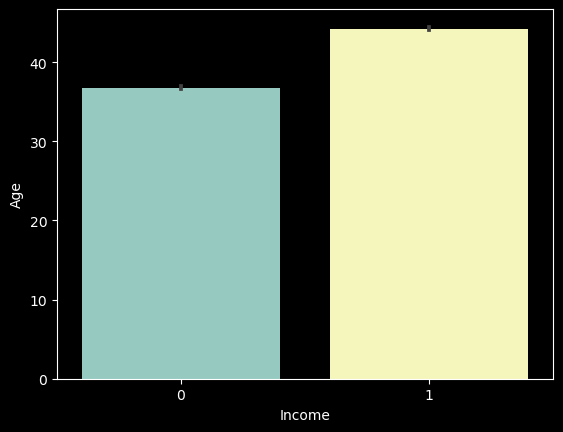

In [26]:
sns.barplot(x='Income',y='Age',data=df)

<Axes: >

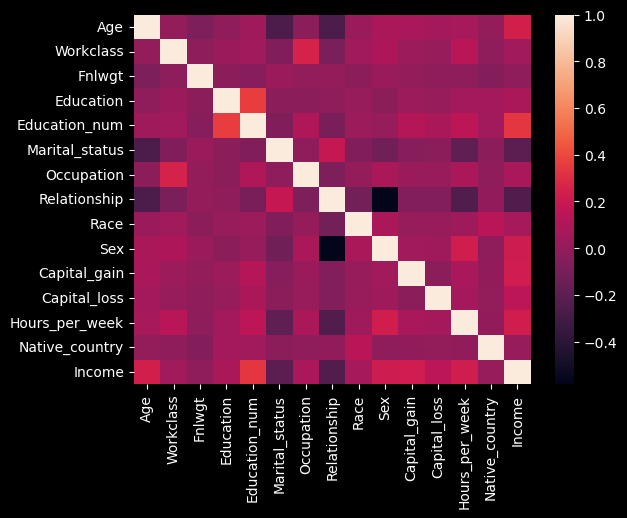

In [27]:
sns.heatmap(df.corr())

In [28]:
X = df.drop(['Income'],axis=1)
y = df['Income']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [32]:
predictions = gb.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4980
           1       0.67      0.31      0.42      1532

    accuracy                           0.80      6512
   macro avg       0.74      0.63      0.65      6512
weighted avg       0.78      0.80      0.77      6512

[[4742  238]
 [1059  473]]
0.8008292383292384
